### Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [5]:
df = pd.read_csv(r"C:\Users\sonid\OneDrive\Desktop\py\Datasets\UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [7]:
df.shape

(1156, 7)

### checking the null columns and data types of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Handling Null Values

In [11]:
df.isna().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [154]:
df.drop(df[df["END_DATE"].isna()].index,axis=0,inplace=True)

In [156]:
df.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
RoundTrip       0
dtype: int64

In [160]:
df.drop(['PURPOSE'],axis=1,inplace=True)

## Checking Duplicate rows

In [162]:
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,RoundTrip


In [164]:
df.drop(df[df.duplicated].index,axis=0,inplace=True)
df[df.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,RoundTrip


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1154 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1154 non-null   object 
 1   END_DATE    1154 non-null   object 
 2   CATEGORY    1154 non-null   object 
 3   START       1154 non-null   object 
 4   STOP        1154 non-null   object 
 5   MILES       1154 non-null   float64
 6   RoundTrip   1154 non-null   object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


### handling the datetime format in proper way if any field has not proper format then converting in the proper format

In [ ]:
df["START_DATE"] = pd.to_datetime(df["START_DATE"],errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"],errors="coerce")
df.head()

### Splitting the START_DATE to date and time column and then converting the time into four different categories

In [177]:
from datetime import datetime
df["DATE"] = pd.DatetimeIndex(df["START_DATE"]).date
df["TIME"] = pd.DatetimeIndex(df["START_DATE"]).hour

df["DAY-NIGHT"] = pd.cut(x=df["TIME"],bins=[0,10,15,19,24],labels=["Morning","Afternoon","Evening","Night"])
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,RoundTrip,DATE,TIME,DAY-NIGHT
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,yes,2016-01-01,21,Night
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,yes,2016-01-02,1,Morning
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,yes,2016-01-02,20,Night
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,yes,2016-01-05,17,Evening
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,no,2016-01-06,14,Afternoon


### droping the null columns 

In [ ]:
df.dropna(inplace=True)

### dropping duplicate columns

In [ ]:
df.drop_duplicates(inplace=True)

### checking unique values in each columns with object datatype

# EDA 
### (Exploratory data analysis)

# univariate

# 1. Category

In [40]:
df["CATEGORY"].unique()

array(['Business', 'Personal'], dtype=object)

#### counting the total number of the travel done in the perticular category

In [56]:
df[["CATEGORY","MILES"]].groupby(["CATEGORY"]).agg(total_miles=("MILES",'sum'))

,total_miles
CATEGORY,
Business,11477.1
Personal,717.7


<Figure size 500x500 with 0 Axes>

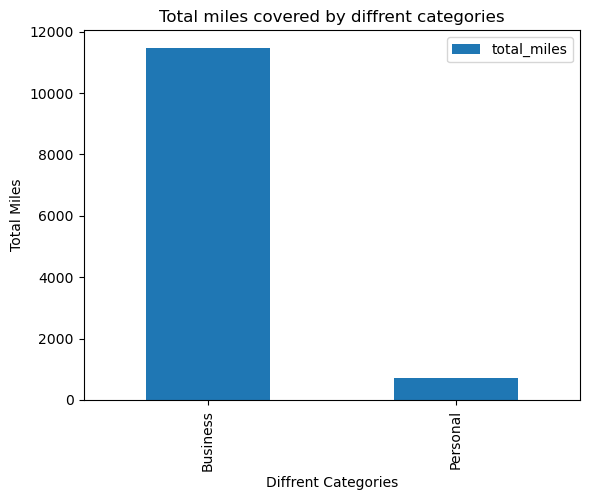

In [72]:
plt.figure(figsize=(5,5))
df[["CATEGORY","MILES"]].groupby(["CATEGORY"]).agg(total_miles=("MILES",'sum')).plot(kind="bar")
plt.ylabel("Total Miles")
plt.xlabel("Diffrent Categories")
plt.title("Total miles covered by diffrent categories")
plt.show()

#### Mostly users use the Uber for the business purpose

In [83]:
len(df["START"].unique())

177

In [87]:
#Top 10 start places
df["START"].value_counts(ascending=False)[:10]

START
Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Lahore               36
Durham               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 most famous pickup points'}, xlabel='PickUp count', ylabel='Places'>

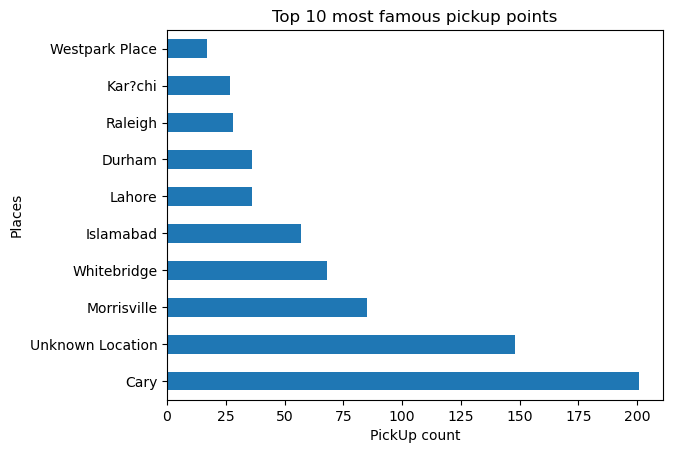

In [98]:
df["START"].value_counts(ascending=False)[:10].plot(kind="barh",ylabel="Places",xlabel="PickUp count",title="Top 10 most famous pickup points")

#### To most famous pickup points is cary and the pickup count is arount 200

In [104]:
len(df["STOP"].unique())

188

In [106]:
df["STOP"].value_counts(ascending=False)[:10]

STOP
Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 most famous drop place'}, xlabel='Drop Count', ylabel='Place'>

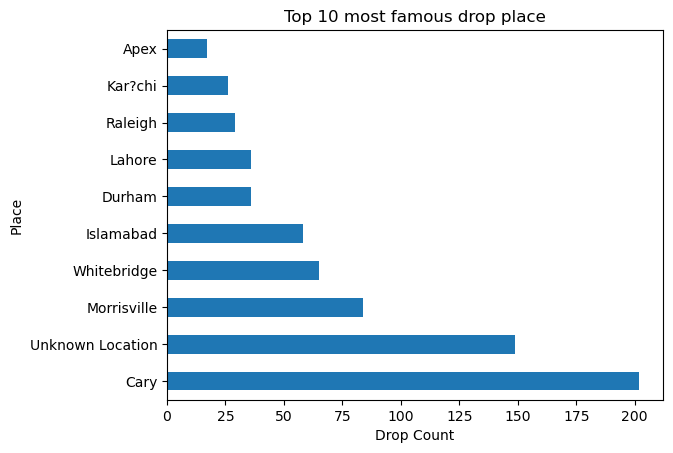

In [108]:
df["STOP"].value_counts(ascending=False)[:10].plot(kind="barh",ylabel="Place",xlabel="Drop Count",title="Top 10 most famous drop place")

#### To most famous Pickup and  Drop points is Cary and the pickup & drop count is around 200

In [114]:
df[df["START"] == "Unknown Location"]["START"].value_counts()

START
Unknown Location    148
Name: count, dtype: int64

In [118]:
df[df["STOP"] == "Unknown Location"]["STOP"].value_counts()

STOP
Unknown Location    149
Name: count, dtype: int64

# Miles

<Axes: xlabel='MILES', ylabel='Count'>

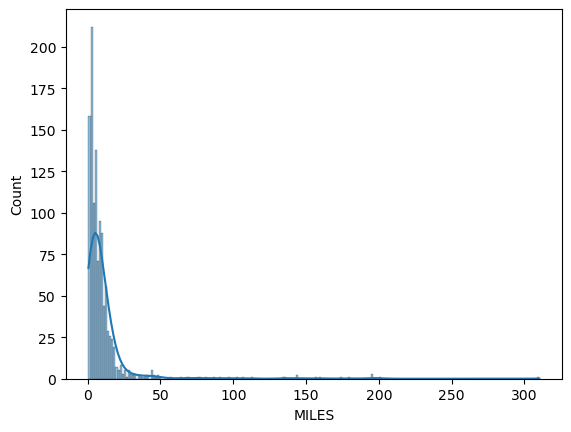

In [121]:
sns.histplot(df["MILES"],kde=True)

# MultiVariate

In [125]:
df.groupby(['START','STOP'])['MILES'].sum().sort_values(ascending=False)[1:11]

START             STOP            
Morrisville       Cary                395.7
Cary              Durham              390.0
                  Morrisville         380.0
Raleigh           Cary                365.7
Cary              Raleigh             336.5
Durham            Cary                324.5
Latta             Jacksonville        310.3
Islamabad         Unknown Location    267.0
Cary              Cary                255.9
Unknown Location  Islamabad           243.8
Name: MILES, dtype: float64

#### Checking for round trip how

Text(0.5, 1.0, 'Customer round-trip ratio')

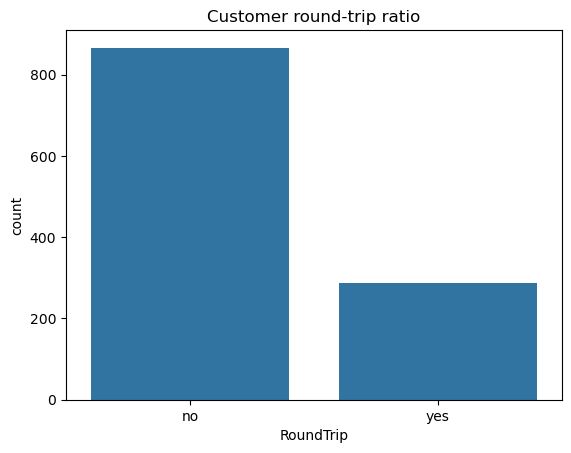

In [135]:
def isRoundTrip(df):
    if df["START"] == df["STOP"]:
        return 'yes'
    else:
        return 'no'

df["RoundTrip"] = df.apply(isRoundTrip,axis=1)
sns.countplot(x='RoundTrip',data=df,order=df["RoundTrip"].value_counts().index)
plt.title("Customer round-trip ratio")

In [139]:
df["RoundTrip"].value_counts()

RoundTrip
no     866
yes    288
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='CATEGORY'>

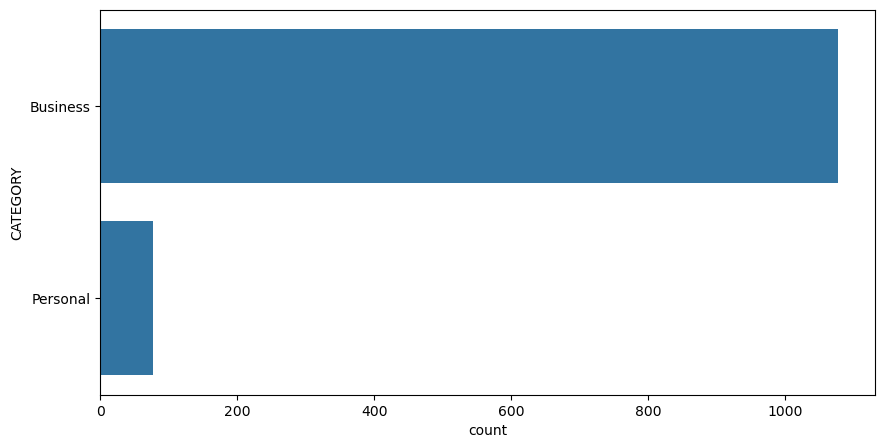

In [145]:
plt.figure(figsize=(10,5))
sns.countplot(df["CATEGORY"])
df.

<Axes: xlabel='count', ylabel='DAY-NIGHT'>

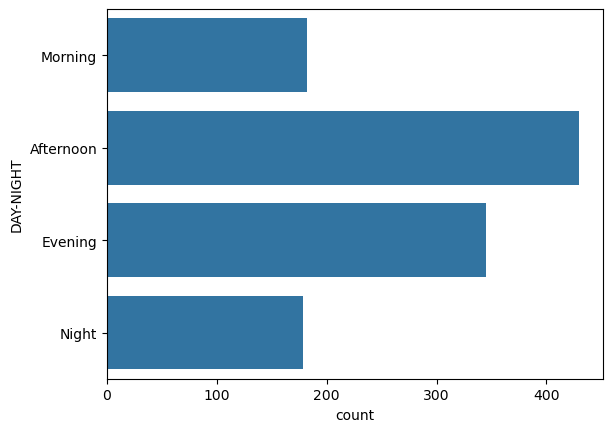

In [181]:
sns.countplot(df["DAY-NIGHT"])

In [229]:
df["DAY"] = pd.DatetimeIndex(df["START_DATE"]).weekday
day_labels = {0:"MONDAY",1:"TUESDAY",2:"WEDNESDAY",3:"THURSDAY",4:"FRIDAY",5:"SATURDAY",6:"SUNDAY"}
df["DAY"] = df["DAY"].map(day_labels)

Text(0, 0.5, 'TOTAL COUNT')

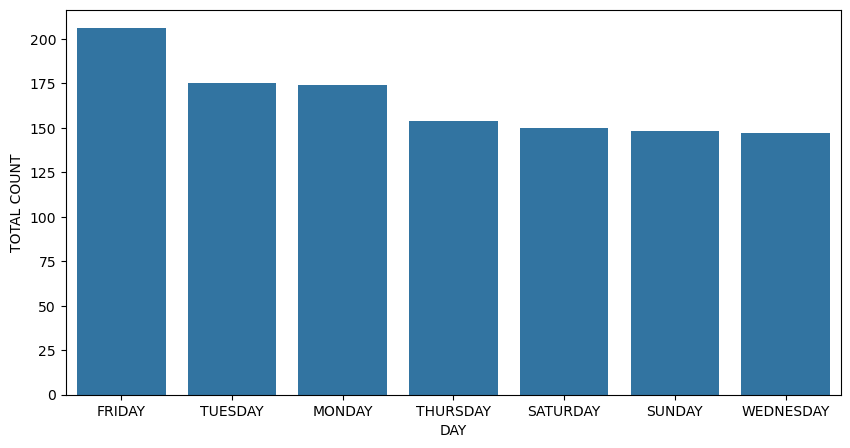

In [237]:
plt.figure(figsize=(10,5))
day_labels = df["DAY"].value_counts()
sns.barplot(x=day_labels.index,y=day_labels)
plt.xlabel("DAY")
plt.ylabel("TOTAL COUNT")

# conclusion 
##### From the analysis, it is clear that business trips account for the highest distance traveled, with around 11,000 miles covered, compared to only 1,500 miles for personal trips. The most common pickup and drop-off location is the city of Cary. It was also observed that most customers do not use round trips. A large number of rides—around 1,000—were for business purposes, while only about 100 were for personal use. The highest number of rides were booked in the afternoon, and Friday saw the most bookings overall. Monday and Tuesday had almost the same number of rides.